In [1]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
from evaluate_model import evaluate_model, get_data, plot_accuracy, plot_loss
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
shape, classes, data = get_data()
train_data, val_data, test_data = data

Found 2392 files belonging to 2 classes.
Using 1914 files for training.
Found 2392 files belonging to 2 classes.
Using 478 files for validation.
Found 597 files belonging to 2 classes.


In [3]:
inputs = Input(shape= shape)
layer1 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(inputs)
layer2 = MaxPooling2D((2,2))(layer1)
layer3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(layer2)
layer4 = MaxPooling2D((2,2))(layer3)
layer5 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(layer4)
layer6 = MaxPooling2D((2,2))(layer5)
layer7 = Flatten()(layer6)
layer8 = Dense(32, activation='relu')(layer7)
outputs = Dense(len(classes), activation='softmax')(layer8)
fd_model = Model(inputs=inputs, outputs=outputs)

fd_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
fd_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 16)        4624  

In [4]:
fd_model_hist = fd_model.fit(
  train_data,
  validation_data=val_data,
  epochs=20
)

Epoch 1/20
60/60 [==============================] - 19s 297ms/step - loss: 3.2622 - accuracy: 0.6050 - val_loss: 0.5631 - val_accuracy: 0.7469
Epoch 2/20
60/60 [==============================] - 20s 323ms/step - loss: 0.4933 - accuracy: 0.7759 - val_loss: 0.4144 - val_accuracy: 0.8285
Epoch 3/20
60/60 [==============================] - 20s 324ms/step - loss: 0.3956 - accuracy: 0.8380 - val_loss: 0.3158 - val_accuracy: 0.8640
Epoch 4/20
60/60 [==============================] - 20s 325ms/step - loss: 0.3937 - accuracy: 0.8417 - val_loss: 0.2955 - val_accuracy: 0.8828
Epoch 5/20
60/60 [==============================] - 20s 324ms/step - loss: 0.2859 - accuracy: 0.8788 - val_loss: 0.2613 - val_accuracy: 0.8891
Epoch 6/20
60/60 [==============================] - 20s 329ms/step - loss: 0.2071 - accuracy: 0.9164 - val_loss: 0.2825 - val_accuracy: 0.8891
Epoch 7/20
60/60 [==============================] - 20s 329ms/step - loss: 0.2220 - accuracy: 0.9117 - val_loss: 0.1914 - val_accuracy: 0.9310

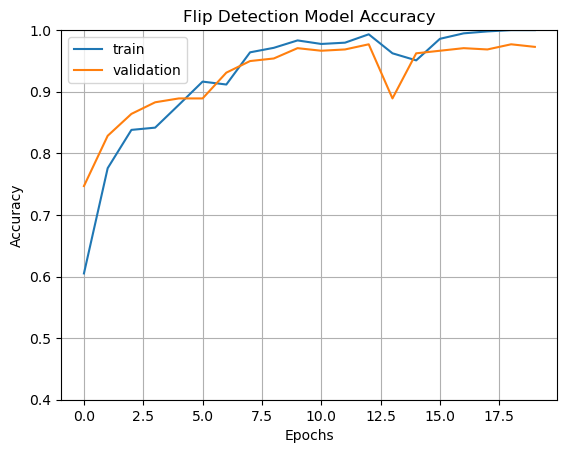

In [5]:
plot_accuracy(fd_model_hist, "Flip Detection Model")

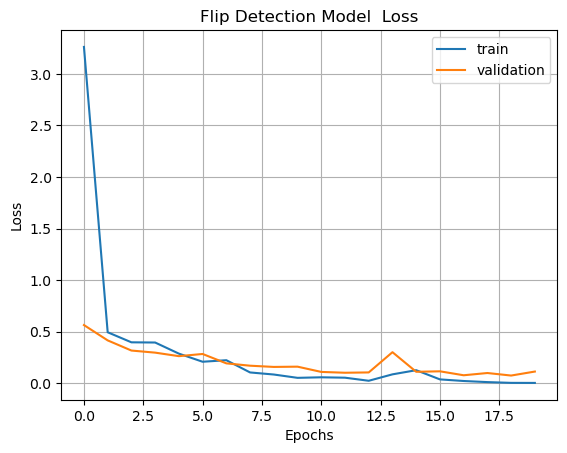

In [6]:
plot_loss(fd_model_hist, "Flip Detection Model")

1/1 [==============================] - 0s 109ms/step


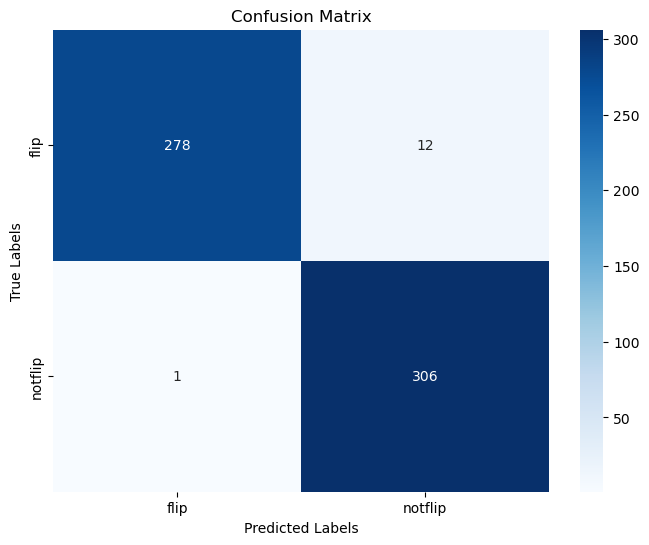

{'accuracy': 0.9782244556113903, 'f1_score': 0.9792}

In [7]:
evaluate_model(fd_model, test_data)

In [8]:
fd_model_path = '../models/fd_model_v4.h5'
fd_model.save(fd_model_path)
fd_model_size = os.path.getsize(fd_model_path) / (1024 * 1024)
print('Model size: ', fd_model_size, 'MB')

Model size:  2.6797714233398438 MB
